In [1]:
%load_ext autoreload
%autoreload 2
from utils import *

In [11]:
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("csv/cmc.csv")
df.sample(5)

,wife's age,wife's education,husband's education,number of children,wife's religion,wife working,husband's occupation,standard-of-living index,media exposure,contraceptive method
472,34,4,4,4,1,1,3,3,0,2
1056,46,1,4,8,1,1,1,4,1,1
66,44,4,2,8,1,1,3,3,0,1
471,34,2,3,2,1,1,3,3,0,2
1155,20,4,4,0,0,0,2,4,0,1


In [3]:
print("wife's age : ", np.unique(df["wife's age"].values))
print("wife's education : ", np.unique(df["wife's education"].values))
print("husband's education : ", np.unique(df["husband's education"].values))
print("number of children : ", np.unique(df["number of children"].values))
print("wife's religion : ", np.unique(df["wife's religion"].values))
print("wife working : ", np.unique(df['wife working'].values))
print("husband's occupation : ", np.unique(df["husband's occupation"].values))
print("standard-of-living index : ", np.unique(df['standard-of-living index'].values))
print("media exposure : ", np.unique(df['media exposure'].values))
print("contraceptive method (class attribute) : ", np.unique(df['contraceptive method'].values))

wife's age :  [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49]
wife's education :  [1 2 3 4]
husband's education :  [1 2 3 4]
number of children :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16]
wife's religion :  [0 1]
wife working :  [0 1]
husband's occupation :  [1 2 3 4]
standard-of-living index :  [1 2 3 4]
media exposure :  [0 1]
contraceptive method (class attribute) :  [1 2 3]


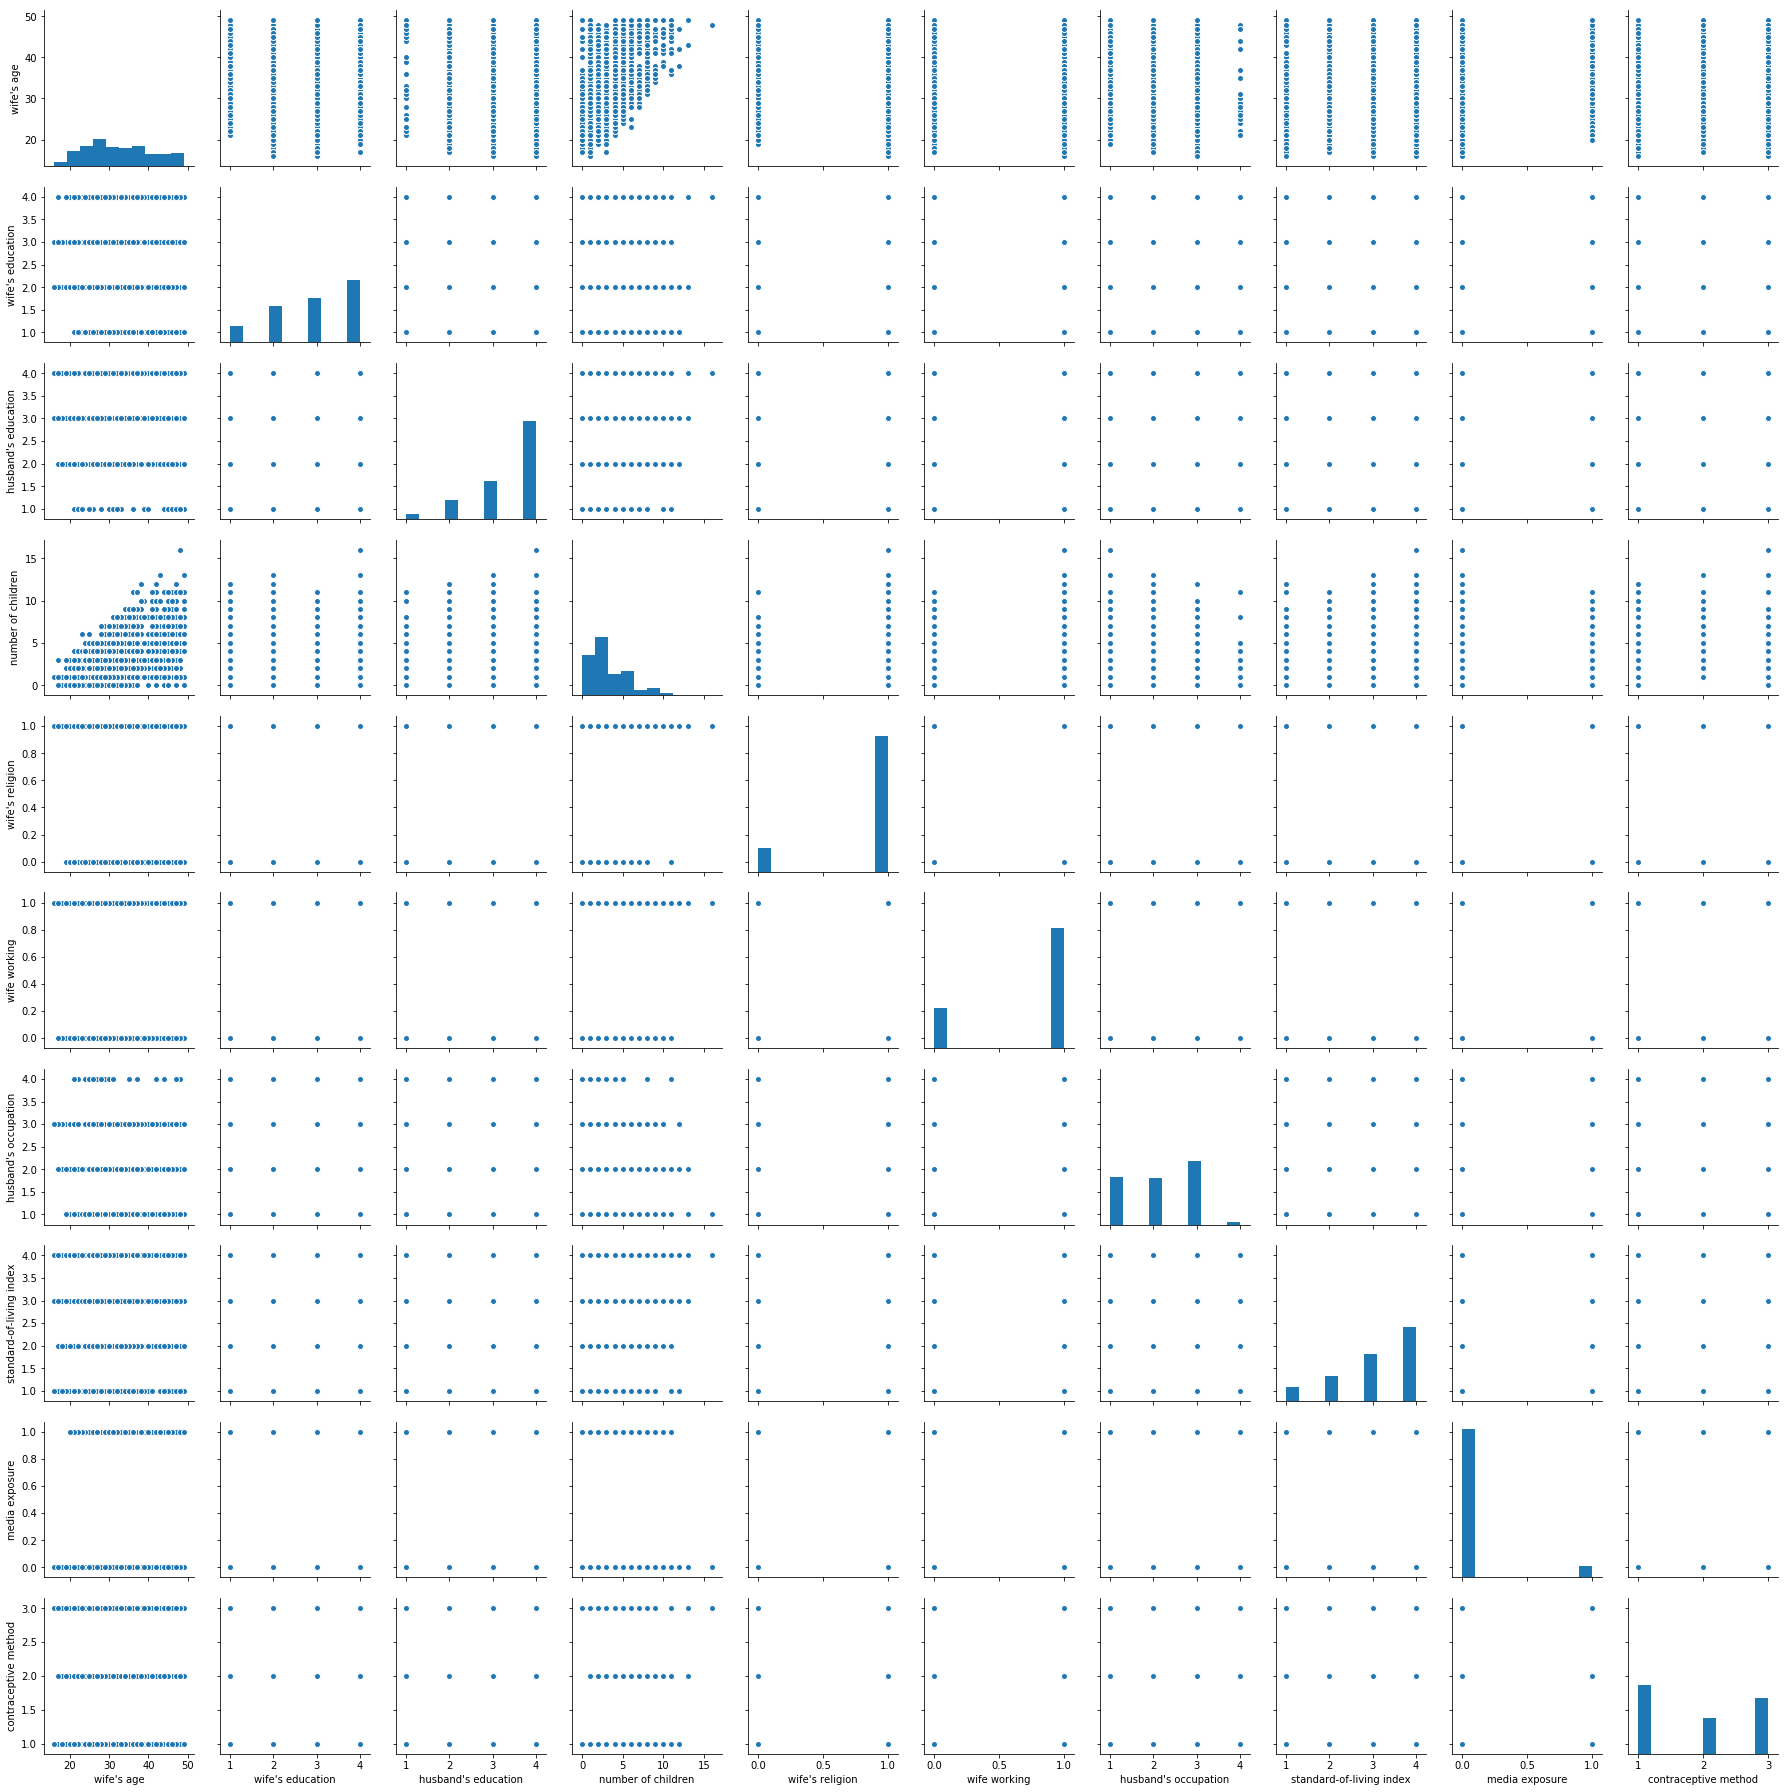

In [12]:
sns.pairplot(df)

In [4]:
m = 9 # input dimension

In [5]:
vectors = df.values
dataset = LabeledSet(m)
dataset.addExamples(vectors[:,0:m], vectors[:,m:])

In [6]:
for i in range(3):
    print("number of instances of class " + str(i+1) + " : " + str(np.count_nonzero(dataset.y == i+1)))

number of instances of class 1 : 629
number of instances of class 2 : 333
number of instances of class 3 : 511


In [7]:
NMI1(dataset)

0.02587517341125771

In [8]:
nb_folds = 4

In [9]:
folds = get_folds(dataset, nb_folds)

In [10]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

# rank Gini discrimination measure 
g_g = One_minus()
rgdm = Gdm(h, g_g, f_r)

# Gini discrimination measure
gdm = Gdm(h, g_g, f)

# H_M
h_m = Max()
g_m = One_minus_square()
H_m = Gdm(h_m, g_m, f_r)

# H_Q
f_q = Avgdsr()
h_q = Square_root()
H_q = Gdm(h_q, g_g, f_q)

In [13]:
acc_list = []
std_acc_list = []
depth_list = []
std_depth_list = []
leaves_list =  []
std_leaves_list = []
ratio_list = []
std_ratio_list = []
pairs_list = []
std_pairs_list = []
evaluations_list = []
std_eval_list = []
pratio_list = []
std_pratio_list = []
nb_examples_list = []
std_nb_examples_list = []

In [14]:
# Rank Shannon discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rsdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [15]:
# Shannon entropy
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(sdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [16]:
# Rank Gini discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(rgdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [17]:
# Gini entropy
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(gdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [18]:
# Pessimistic rank discrimination measure
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(prdm, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [19]:
# H_M
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(H_m, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

In [20]:
# H_Q
acc = []
leaves = []
depth = []
ratio = []
pairs = []
evaluation = []
p_ratio = []
nb_examples = []

for i in range(nb_folds):
    test_set = folds[i]
    train_set = LabeledSet(m)
    for j in range(0, nb_folds):
        if i != j:
            train_set.addExamples(folds[j].x, folds[j].y)
    tree = RDMT(H_q, "shannon", 0, 100, 0.01 * train_set.size(), [1, 2, 3])
    tree.train(train_set)
    acc.append(tree.accuracy(test_set))
    leaves.append(tree.get_nb_leaves())
    depth.append(tree.get_depth())
    ratio.append(tree.get_ratio_non_monotone_pairs())
    pairs.append(tree.get_total_pairs())
    evaluation.append(tree.evaluate_monotonicity())
    p_ratio.append(tree.pairs_ratio())
    nb_examples.append(tree.get_total_examples_ratio())    
    
avg_accuracy = np.mean(acc)
std_accuracy = np.std(acc)
avg_leaves = np.mean(leaves)
std_leaves = np.std(leaves)
avg_depth = np.mean(depth)
std_depth = np.std(depth)
avg_ratio = np.mean(ratio)
std_ratio = np.std(ratio)
avg_pairs = np.mean(pairs)
std_pairs = np.std(pairs)
avg_eval = np.mean(evaluation)
std_eval = np.std(evaluation)
avg_pratio = np.mean(p_ratio)
std_pratio = np.std(p_ratio)
avg_nb_examples = np.mean(nb_examples)
std_nb_examples = np.std(nb_examples)

acc_list.append(avg_accuracy)
std_acc_list.append(std_accuracy)

depth_list.append(avg_depth)
std_depth_list.append(std_depth)

leaves_list.append(avg_leaves)
std_leaves_list.append(std_leaves)

ratio_list.append(avg_ratio)
std_ratio_list.append(std_ratio)

pairs_list.append(avg_pairs)
std_pairs_list.append(std_pairs)

evaluations_list.append(avg_eval)
std_eval_list.append(std_eval)

pratio_list.append(avg_pratio)
std_pratio_list.append(std_pratio)

nb_examples_list.append(avg_nb_examples)
std_nb_examples_list.append(std_nb_examples)

KeyboardInterrupt: 

In [ ]:
s_cci = ""
for i in range(7):
    s_cci += "& " + "{0:.2f}".format(acc_list[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_acc_list[i]) + " \% "

s_depth = ""
for i in range(7):
    s_depth += "& " + "{0:.2f}".format(depth_list[i]) + " $\pm$ " + "{0:.2f}".format(std_depth_list[i]) + ""

s_leaves = ""
for i in range(7):
    s_leaves += "& " + "{0:.2f}".format(leaves_list[i]) + " $\pm$ " + "{0:.2f}".format(std_leaves_list[i]) + ""

s_ratio = ""
for i in range(7):
    s_ratio += "& " + "{0:.2f}".format(ratio_list[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_ratio_list[i] * 100) + " \%"
    
s_pairs = ""
for i in range(7):
    s_pairs += "& " + "{0:.2f}".format(pairs_list[i]) + " $\pm$ " + "{0:.2f}".format(std_pairs_list[i]) + ""

s_eval = ""
for i in range(7):
    s_eval += "& " + "{0:.2f}".format(evaluations_list[i]) + " $\pm$ " + "{0:.2f}".format(std_eval_list[i]) + ""

s_pratio = ""
for i in range(7):
    s_pratio += "& " + "{0:.2f}".format(pratio_list[i]) + " $\pm$ " + "{0:.2f}".format(std_pratio_list[i]) + ""

s_nb_examples = ""
for i in range(7):
    s_nb_examples += "& " + "{0:.2f}".format(nb_examples_list[i]) + " $\pm$ " + "{0:.2f}".format(std_nb_examples_list[i]) + ""

In [22]:
s_cci = ""
for i in range(5):
    s_cci += "& " + "{0:.2f}".format(acc_list[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_acc_list[i]) + " \% "

s_depth = ""
for i in range(5):
    s_depth += "& " + "{0:.2f}".format(depth_list[i]) + " $\pm$ " + "{0:.2f}".format(std_depth_list[i]) + ""

s_leaves = ""
for i in range(5):
    s_leaves += "& " + "{0:.2f}".format(leaves_list[i]) + " $\pm$ " + "{0:.2f}".format(std_leaves_list[i]) + ""

s_ratio = ""
for i in range(5):
    s_ratio += "& " + "{0:.2f}".format(ratio_list[i] * 100) + " \% $\pm$ " + "{0:.2f}".format(std_ratio_list[i] * 100) + " \%"
    
s_pairs = ""
for i in range(5):
    s_pairs += "& " + "{0:.2f}".format(pairs_list[i]) + " $\pm$ " + "{0:.2f}".format(std_pairs_list[i]) + ""

s_eval = ""
for i in range(5):
    s_eval += "& " + "{0:.2f}".format(evaluations_list[i]) + " $\pm$ " + "{0:.2f}".format(std_eval_list[i]) + ""

s_pratio = ""
for i in range(5):
    s_pratio += "& " + "{0:.2f}".format(pratio_list[i]) + " $\pm$ " + "{0:.2f}".format(std_pratio_list[i]) + ""

s_nb_examples = ""
for i in range(5):
    s_nb_examples += "& " + "{0:.2f}".format(nb_examples_list[i]) + " $\pm$ " + "{0:.2f}".format(std_nb_examples_list[i]) + ""

In [23]:
print("CCI ", s_cci)
print("avgDepth ", s_depth)
print("avgLeaves ", s_leaves)
print("avgRatio ", s_ratio)
print("avgNbPairs ", s_pairs)
print("avgEval ", s_eval)
print("avgPairRatio ", s_pratio)
print("avgNbExamples ", s_nb_examples)

CCI  & 47.05 \% $\pm$ 0.02 \% & 49.63 \% $\pm$ 0.01 \% & 47.32 \% $\pm$ 0.02 \% & 49.49 \% $\pm$ 0.01 \% & 48.95 \% $\pm$ 0.02 \% 
avgDepth  & 22.50 $\pm$ 2.18& 17.50 $\pm$ 0.87& 22.00 $\pm$ 2.55& 18.00 $\pm$ 1.58& 27.50 $\pm$ 1.80
avgLeaves  & 209.00 $\pm$ 8.75& 163.75 $\pm$ 2.28& 206.25 $\pm$ 14.55& 168.25 $\pm$ 2.77& 204.25 $\pm$ 3.27
avgRatio  & 59.46 \% $\pm$ 2.48 \%& 50.38 \% $\pm$ 5.44 \%& 57.56 \% $\pm$ 2.11 \%& 53.05 \% $\pm$ 4.51 \%& 64.25 \% $\pm$ 4.80 \%
avgNbPairs  & 44.25 $\pm$ 2.59& 46.00 $\pm$ 2.45& 44.75 $\pm$ 3.27& 42.00 $\pm$ 1.22& 40.25 $\pm$ 2.86
avgEval  & 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00& 0.01 $\pm$ 0.00
avgPairRatio  & 0.21 $\pm$ 0.02& 0.28 $\pm$ 0.01& 0.22 $\pm$ 0.01& 0.25 $\pm$ 0.01& 0.20 $\pm$ 0.01
avgNbExamples  & 624.00 $\pm$ 47.07& 736.75 $\pm$ 18.79& 641.00 $\pm$ 24.27& 673.00 $\pm$ 26.39& 580.25 $\pm$ 66.74
